### Student Information
Name: 趙苡棋 (Yichi Chao)

Student ID: 109070024

GitHub ID: YiChiChao

---

### Instructions

1. [ ] First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. [x] Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. [ ] Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - [ ] Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - [x] Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - [x] Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. [ ] Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. [ ] Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

### Begin Assignment Here

In [4]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [5]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [8]:
!cd /content/drive/MyDrive/Colab\ Notebooks/DMLab1/DM2022-Lab1-Homework

In [ ]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [ ]:
X

In [ ]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [ ]:
# a simple query
X[:10]

### 1. Take Home Exercise in DM2022-Lab1-Master

#### Exercise2
#### Selection by Position


In [ ]:
# using iloc (by position)
X.iloc[:10, 0]

In [ ]:
X[:5]

In [ ]:
X[:10:2]

In [ ]:
#Backwards
X[:2250:-1]

#### Pass a list of columns to `[] `to select columns in that order.

In [ ]:
X[['text', 'category']] = X[['category', 'text']]

In [ ]:
X

In [ ]:
X[['text', 'category']] = X[['category', 'text']]

In [ ]:
X

---

#### Selection by Label

In [ ]:
Y = pd.DataFrame.from_records(dmh.format_rows(twenty_train), 
                   columns=['text'], index = pd.date_range('1/1/2000', periods=2257))


In [ ]:
#select the row from '2000-02-25' to the end
Y.loc['2000-02-25':]

In [ ]:
#select the row '2000-02-25' and '2000-03-27' (Add one more bracket inside)
Y.loc[['2000-02-25', '2000-03-27']]

#### Selection by Callable

In [ ]:
Z = pd.DataFrame.from_records(dmh.format_rows(twenty_train), 
                   columns=['text'])
# add category to the dataframe
Z['category'] = twenty_train.target
# add category label also
Z['category_name'] = Z.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [ ]:
##index can be a callable
Z.loc[lambda date: date['category'] > 2 , :]

#### Combining positional and label-based indexing

In [ ]:
##The row from 0 to 2
Z.loc[0:2, ['text', 'category_name']]

In [ ]:
##The row 0 and 2
Z.loc[[0,2], ['text', 'category_name']]

####  Exercise 5 

There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.
𝐻𝑖𝑛𝑡  : why .isnull() didn't work?

In [ ]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

In [ ]:
NA_df['missing_example'].isnull()

Ans: From my observation, the rows which can be identified by the function `.isnull()` has the regular format of expressing NaN. For example: `np.nan`, `None` or not even input any information. However, in reality we cannot expect how the dataset creator to inputing their data. 
    To efficiently find those missing values, such as inputting the NaN or None as a string type, or even typing a space. We can first know the type of the column, and filter the NaN data by checking the data type in each input.
    If the column type is string, we can first create a list of "possible NaN inputs" to efficiently find out the hidden missing data.
    

In [ ]:
# Import Regular Expressions lib
import re
# Using regex to find the NA values
# first separate the NaN data and other datas
NA_df.missing_example.apply(lambda x: len(re.findall('NaN|[x|?|!|#|-|]|None|', x)) !=0 if pd.notnull(x) else True)

#### Example 6

In [ ]:
X[:100]

In [ ]:
X_sample = X.sample(n=1000) #random state

In [ ]:
len(X_sample)

In [ ]:
X_sample[:15]

Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
len(X)

In [ ]:
X[:277]

#### Exercise 8


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
categories

In [ ]:
# Create two dataset
A = X[:1000]
B = X[1000:2000]


In [ ]:
print(A.category_name.value_counts())
print("\n")
print(B.category_name.value_counts())
bar = np.arange(len(categories))
width = 0.3
plt.bar(bar, A.category_name.value_counts(), width,  label='A')
plt.bar(bar+width, B.category_name.value_counts(), width, color='orange', label='B')
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
plt.xticks(bar + width / 2, categories)
plt.xticks(fontsize = 8) 
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [ ]:
X[0:4]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
#analyze(X.text[0])
#X_counts.vocabulary_

In [ ]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

In [ ]:
# We can check the shape of this matrix by:
X_counts.shape

In [ ]:
count_vect.get_feature_names_out()[0:100]

In [ ]:
Xarray = X_counts.toarray()

In [ ]:
count_vect.get_feature_names_out()[37:38]

In [ ]:
r = pd.DataFrame(X_counts[0:5, 0:100].toarray(),columns=count_vect.get_feature_names()[0:100])

In [ ]:
r

#### Exercise 10

In [ ]:
print(X_counts[0:5, 0:100])

We print out the X_counts to know that the location (4, 37) contains a one as well.

The `inverse_transform(X)` function return terms per document with nonzero entries in X. ( X is an array )

In [ ]:
count_vect.inverse_transform(X_counts[0:5, 0:100].toarray())

Therefore, we can know that beside `'00'`, `'01' `also contains a 1.

In [ ]:
Xarray = X_counts.toarray()

In [ ]:
X_counts.shape

#### Exercise 11

In [ ]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]

In [ ]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
plot_z = X_counts[0:100, 0:100].toarray()
#plot_z

In [ ]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(14, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

**Problem:**
Since the frequency of the term exist is sparse, it is difficult to draw the whole map out when the matrix is huge, and also if we split it into "subheatmap", it makes no sense to analysis.

Therefore, if we aggregate the frequency of the term in the whole document, and make a plot table, we are able to know how frequently those certain terms exist in the whole dataset. 

Although it might not be a good visualization for prediction or other machine learning processes, it might help people initially know clearly about the dataset.


In [ ]:
Xarray

## Part 2


Import the dataset: amazon_cells_labelled.txt

In [ ]:
import pandas as pd
data = pd.read_csv('amazon_cells_labelled.txt', sep="\t", header=None)
data.columns = ['Sentence', 'Score']


In [ ]:
len(data.Sentence)

Split into a subset

In [ ]:
# An example of what the subset contains
print("\n".join(data.Sentence[0].split("\n")))

check the score of the sentence:

In [ ]:
print(data.Score[0])

Get an array of first 10 scores:

In [ ]:
data.Score[:10]

###Exercise 1

In this exercise, please print out the text data(Sentence) for the first three samples in the dataset. 

In [ ]:
print(data.Sentence[:3])

In [ ]:
import helpers.data_mining_helpers as dmh

Since the data is in dataframe type, I will omit the transformation of the data.

Add a new column

In [ ]:
Appraise = ['Bad', 'Good']

def form(target, Appraise):
  return Appraise[target]

data['appraise'] = data.Score.apply(lambda t: form(t, Appraise))

Print the modified dataframe:

In [ ]:
data[0:10]

More simple query

In [ ]:
data[:10][["Sentence", "appraise"]]

In [ ]:
data[-10:]

In [ ]:
#by label
data.loc[:10, "appraise"]

In [ ]:
#by position
data.iloc[:10, 0]

### Missing Value

First, check our missing value

In [ ]:
data.isnull()

In [ ]:
#since the dataframe is very big, we collect the data to see as a whole
data.isnull().apply(lambda x: dmh.check_missing_values(x))

**Dummy Values**

I will add the strange input into the `Score` category, and present the solutions of different expression of null inputs in `Score`.






In [ ]:
# dummy record as dictionary format
# input -1 as a no meaning information
dummy_dict = [{'Sentence': 'Not thing',
               'Score': -1, 
              }]
data_wthDummy = pd.concat([data, pd.DataFrame(dummy_dict)], ignore_index=True)


In [ ]:
#Original isnull() function cannot filter out the null in the Sentence and Score
data_wthDummy.isnull().apply(lambda x: dmh.check_missing_values(x))

In [ ]:
#By checking if it is a valid value for the score to determine if it is null
def checkNullValue(X):
  if X != 0 :
    if X!= 1:
      return True
    else:
      return False
  else:
    return False

data_wthDummy.Score.apply(lambda x:checkNullValue(x) if pd.notnull(x) else False)


### Dealing with Duplicate Value

In [ ]:
data.duplicated()

In [ ]:
sum(data.duplicated())

After we drop the duplicates, we can see the sum of the duplicates turns into 0.

In [ ]:
# keep parameter determine if you keep the first or last duplicate value
# inplace applies changes directly on our dataframe
data.drop_duplicates(keep='first', inplace=True)

In [ ]:
sum(data.duplicated())

In [ ]:
data.duplicated()

### Sampling

In [ ]:
data_sample = data.sample(n=225) #random state

In [ ]:
len(data_sample)

We can see that sample is a random state:

In [ ]:
data_sample[15:20]

In [ ]:
data['unigrams'] = data['Sentence'].apply(lambda x: dmh.tokenize_text(x))

In [ ]:
data.unigrams

In [ ]:
list(data[0:1]['unigrams'])

In [ ]:
data[0:4]

### Generate a document-term Matrix 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()
data_counts = count_vector.fit_transform(data.Sentence) #learn the vocabulary and return document-term matrix
print(data_counts[:, 100:110])

In [ ]:
data_counts.shape

In [ ]:
#The feature names of the vectorizer, which at least exist once in the documents
count_vector.get_feature_names_out()[100:110]

In [ ]:
print(data_counts[:, 100:110])

By the print above, we can know that the terms between 100~120 exist in those sentences.

Therefore, we can know in the interval of sentence 620 to 630, there only exists two words in the interval 100 to 120, which is 'anyone' and 'apart'.

In [ ]:
data_counts[620:630, 100:120].toarray()

In [ ]:
count_vector.get_feature_names_out()[100:101]

In [ ]:
count_vector.get_feature_names_out()[104:105]

Draw a small Heatmap

In [ ]:
# 100~120 features only
plot_x = ["term_"+str(i) for i in count_vector.get_feature_names_out()[100:120]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[620:630]]
plot_z = data_counts[620:630, 100:120].toarray()
#plot_z

In [ ]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())

In [ ]:
print(data_reduced)

In [ ]:
Appraise

In [ ]:
col = ['coral', 'blue', 'black', 'orange'] 

In [ ]:
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, appraise in zip(col, Appraise):
  #print(data['appraise'])
  xs = data_reduced[data['appraise'] == appraise].T[0]
  ys = data_reduced[data['appraise'] == appraise].T[1]
  #print(xs)
  #print(c)
  ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### Aggregation

In [ ]:
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))


In [ ]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

In [ ]:
term_frequencies

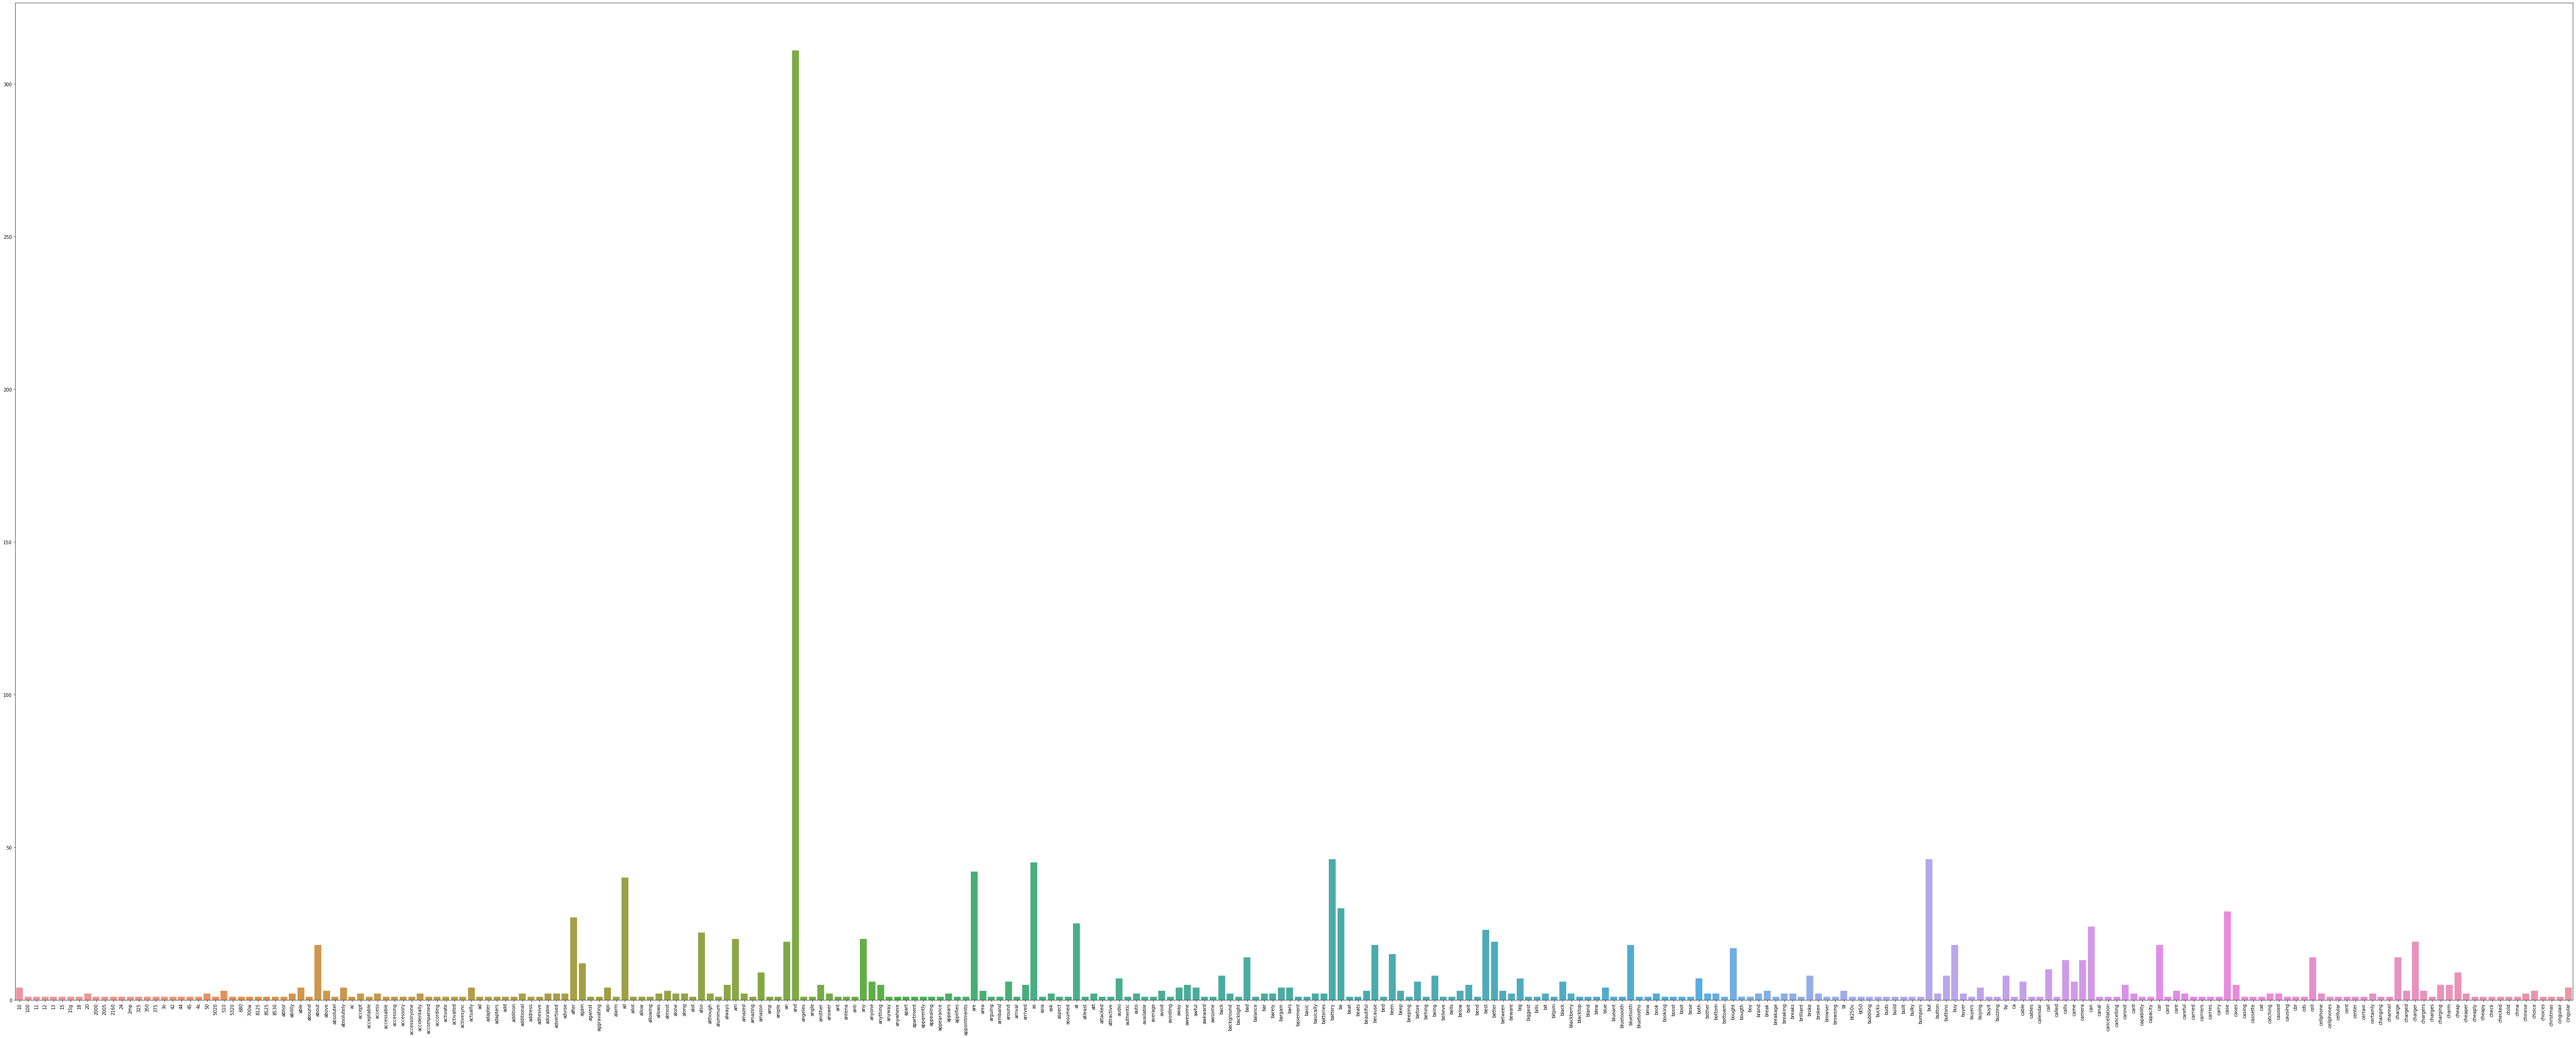

In [ ]:
plt.subplots(figsize=(100, 40))
g = sns.barplot(x=count_vector.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vector.get_feature_names_out()[:300], rotation = 90);

Try it in Plotly: 

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import plotly.express as px

fig = px.bar(x = count_vect.get_feature_names_out()[:300], y = term_frequencies[:300],labels=dict(x = "Terms", y = "Freq"), width=800, height=400)

fig.show()

NameError: ignored

### Discretization and Binarization

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [ ]:
mlb = preprocessing.LabelBinarizer()

In [ ]:
mlb.fit(data.Score)

LabelBinarizer()

In [ ]:
data['bin_score'] = mlb.transform(data['Score']).tolist()

In [ ]:
data[0:9]

,Sentence,Score,appraise,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,Bad,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,Good,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,Good,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,Bad,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,Good,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,Bad,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,Bad,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,Good,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,Bad,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


In [ ]:
mlb.fit(data.appraise)

LabelBinarizer()

In [ ]:
data['bin_appraise'] = mlb.transform(data['appraise']).tolist()

In [ ]:
data[0:9]

,Sentence,Score,appraise,unigrams,bin_score,bin_appraise
0,So there is no way for me to plug it in here i...,0,Bad,"[So, there, is, no, way, for, me, to, plug, it...",[0],[0]
1,"Good case, Excellent value.",1,Good,"[Good, case, ,, Excellent, value, .]",[1],[1]
2,Great for the jawbone.,1,Good,"[Great, for, the, jawbone, .]",[1],[1]
3,Tied to charger for conversations lasting more...,0,Bad,"[Tied, to, charger, for, conversations, lastin...",[0],[0]
4,The mic is great.,1,Good,"[The, mic, is, great, .]",[1],[1]
5,I have to jiggle the plug to get it to line up...,0,Bad,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0],[0]
6,If you have several dozen or several hundred c...,0,Bad,"[If, you, have, several, dozen, or, several, h...",[0],[0]
7,If you are Razr owner...you must have this!,1,Good,"[If, you, are, Razr, owner, ..., you, must, ha...",[1],[1]
8,"Needless to say, I wasted my money.",0,Bad,"[Needless, to, say, ,, I, wasted, my, money, .]",[0],[0]


### Data Exploration

Check the similarity

In [ ]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[222]
random_record_1 = random_record_1['Sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[333]
random_record_2 = random_record_2['Sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[444]
random_record_3 = random_record_3['Sentence']
document_to_transform_3.append(random_record_3)

In [ ]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Simple, lightweight and great fit.']
["very clear, quality sound and you don't have to mess with the sound on your iPod since you have the sound buttons on the headset."]
['Does not fit.']


Split the sentences into words, and check with the 

In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vector.transform(document_to_transform_1)
document_vector_count_2 = count_vector.transform(document_to_transform_2)
document_vector_count_3 = count_vector.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
#.todense() : transfer sparse matrix into regular matrix
print(document_vector_count_1.todense())
print('\n')
print("Compare document_vector_count_2 and document_vector_count_2_bin, the not-1 values in document_vector_count_2 turn into 1.")
print('\n')
print(document_vector_count_2)
print('\n')
print(document_vector_count_2_bin)
print('\n')
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]


Compare document_vector_count_2 and document_vector_count_2_bin, the not-1 values in document_vector_count_2 turn into 1.


  (0, 91)	1
  (0, 226)	1
  (0, 302)	1
  (0, 478)	1
  (0, 749)	2
  (0, 755)	1
  (0, 849)	1
  (0, 1005)	1
  (0, 1104)	2
  (0, 1278)	1
  (0, 1461)	1
  (0, 1510)	3
  (0, 1604)	3
  (0, 1640)	1
  (0, 1737)	1
  (0, 1812)	1
  (0, 1843)	2
  (0, 1844)	1


  (0, 91)	1
  (0, 226)	1
  (0, 302)	1
  (0, 478)	1
  (0, 749)	1
  (0, 755)	1
  (0, 849)	1
  (0, 1005)	1
  (0, 1104)	1
  (0, 1278)	1
  (0, 1461)	1
  (0, 1510)	1
  (0, 1604)	1
  (0, 1640)	1
  (0, 1737)	1
  (0, 1812)	1
  (0, 1843)	1
  (0, 1844)	1


[[0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)
#Calculate the Cosine Similarity of the binarize data
cos_sim_count_1_2_bin = cosine_similarity(document_vector_count_1_bin, document_vector_count_2_bin, dense_output=True)
cos_sim_count_1_3_bin = cosine_similarity(document_vector_count_1_bin, document_vector_count_3_bin, dense_output=True)
cos_sim_count_2_3_bin = cosine_similarity(document_vector_count_2_bin, document_vector_count_3_bin, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("\n")
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})
print("\n")
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2_bin})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3_bin})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3_bin})

Cosine Similarity using count bw 1 and 2: 0.068199
Cosine Similarity using count bw 1 and 3: 0.258199
Cosine Similarity using count bw 2 and 3: 0.000000


Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


Cosine Similarity using count bw 1 and 2: 0.105409
Cosine Similarity using count bw 1 and 3: 0.258199
Cosine Similarity using count bw 2 and 3: 0.000000


## Part3 Data Visualization

In [1]:
#new_data
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Website = ['Amazon', 'IMDb', 'Yelp' ]
col = ['salmon', 'gold', 'dodgerblue', 'yellowgreen']
insert_imdb = pd.read_csv(r'sentiment labelled sentences/yelp_labelled.txt', sep="\t", header=None)
insert_imdb['website'] = Website[1]
insert_yelp = pd.read_csv(r'sentiment labelled sentences/imdb_labelled.txt', sep="\t", header=None)
insert_yelp['website'] = Website[2]
insert_amazon = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', sep="\t", header=None)
insert_amazon['website'] = Website[0]
new_data = pd.concat([insert_imdb, insert_yelp, insert_amazon], ignore_index = True)
insert_imdb.columns = ['Sentence', 'Score', 'website']
insert_yelp.columns = ['Sentence', 'Score', 'website']
insert_amazon.columns = ['Sentence', 'Score', 'website']
new_data.columns = ['Sentence', 'Score', 'website']

In [3]:
N_count_vect = CountVectorizer(min_df = 15, max_df = 500)
data_collect = N_count_vect.fit_transform(new_data.Sentence)
imbd_count = N_count_vect.transform(insert_imdb.Sentence)
yelp_count = N_count_vect.transform(insert_yelp.Sentence)
amazon_count = N_count_vect.transform(insert_amazon.Sentence)

In [4]:
term_frequencies = []
term_frequencies.append(np.asarray(imbd_count.sum(axis=0))[0])
term_frequencies.append(np.asarray(yelp_count.sum(axis=0))[0])
term_frequencies.append(np.asarray(amazon_count.sum(axis=0))[0])

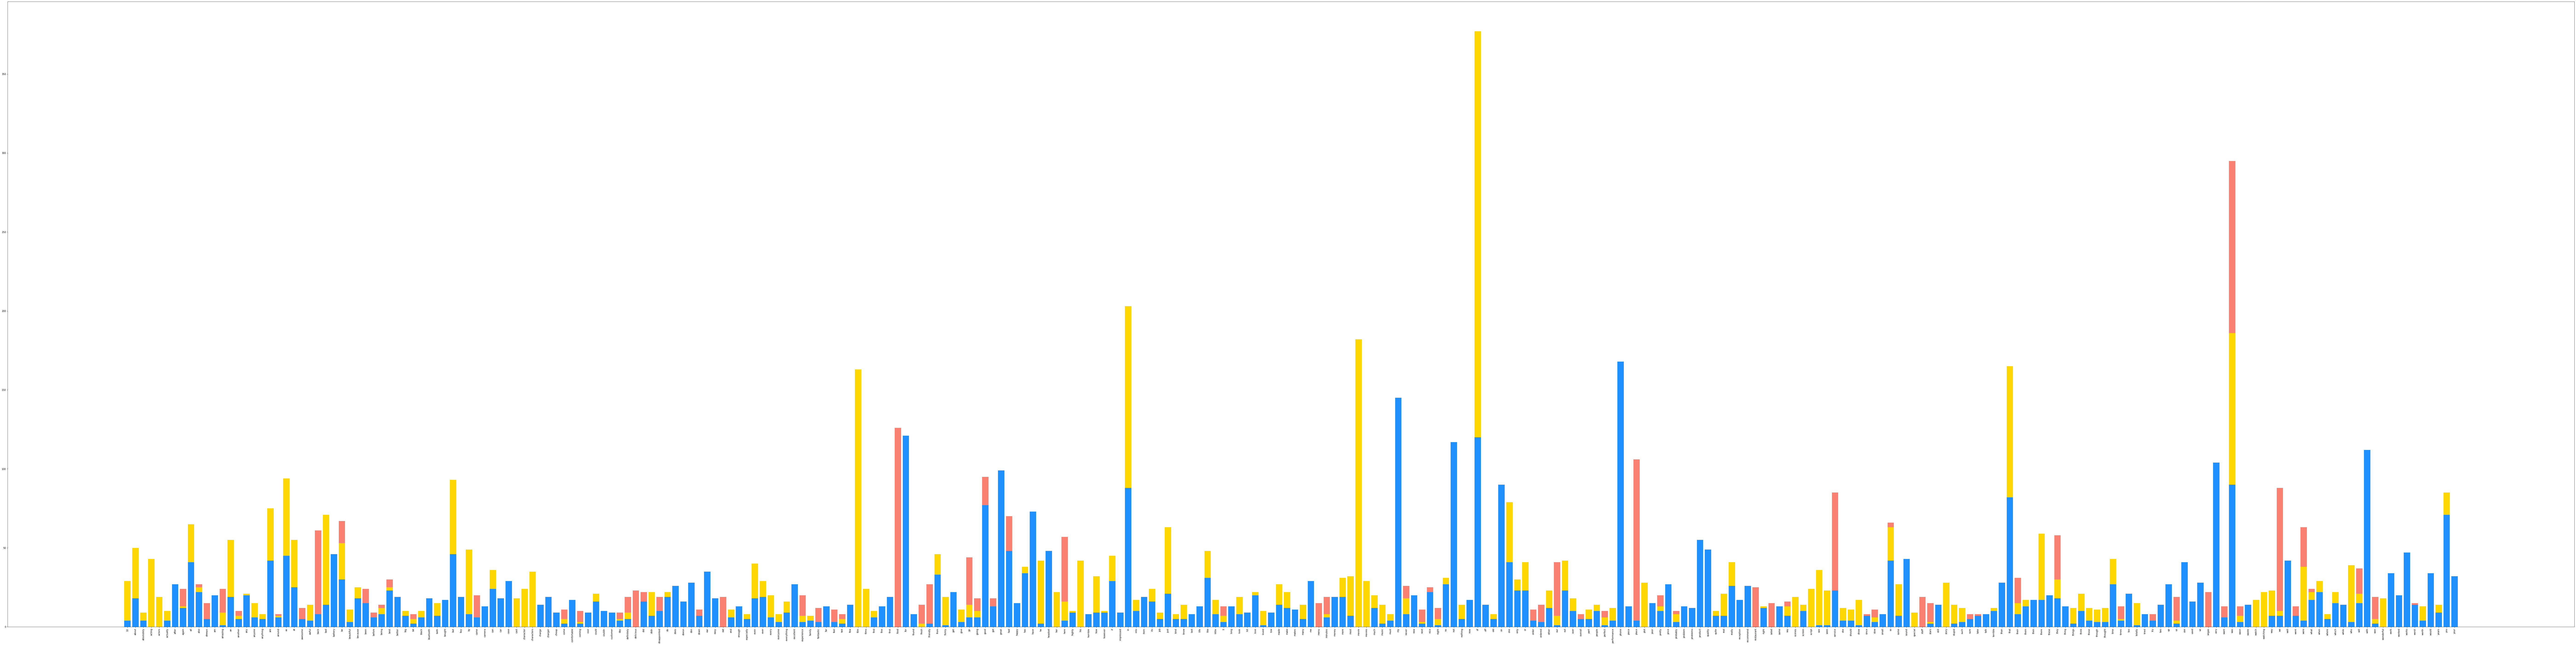

In [6]:
fig = plt.figure(figsize = (200,50))
ax = fig.subplots()
for j in range(3):
    xs = N_count_vect.get_feature_names_out()
    ys = term_frequencies[j]
   
    ax.bar(xs, ys, color = col[j])
plt.xticks(rotation = 90) 
plt.show()

In [ ]:
new_data.drop_duplicates(keep='first', inplace=True)

### TD-IDF Feature

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### Data Preprocessing

In [10]:
#Drop out the not important column
cols = ['Score']
new_data = new_data.drop(cols, axis=1)

In [11]:
# Drop the missing value
new_data = new_data.dropna()

In [13]:
#Check the Duplicated Data
sum(new_data.duplicated())

17

In [14]:
new_data.drop_duplicates()

,Sentence,website
0,Wow... Loved this place.,IMDb
1,Crust is not good.,IMDb
2,Not tasty and the texture was just nasty.,IMDb
3,Stopped by during the late May bank holiday of...,IMDb
4,The selection on the menu was great and so wer...,IMDb
...,...,...
2743,The screen does get smudged easily because it ...,Amazon
2744,What a piece of junk.. I lose more calls on th...,Amazon
2745,Item Does Not Match Picture.,Amazon
2746,The only thing that disappoint me is the infra...,Amazon


#### Generating the TF-IDF Feature

In [15]:
# initialise TfidfVectorizer
vectoriser = TfidfVectorizer(norm = None)

# 文件矩陣（term-document matrix）用來表示各個單詞在整個語料庫中之於文件的重要性，其由 tf-idf scores 所構成。
tf_idf_scores = vectoriser.fit_transform(new_data.Sentence)

Part 1 

In [16]:
featureNames = vectoriser.get_feature_names()
corpus_index = [n for n in new_data.Sentence]
# create pandas DataFrame with tf-idf scores: Term-Document Matrix
df_tf_idf = pd.DataFrame(tf_idf_scores.T.todense(), index = featureNames, columns = corpus_index)

# The result of the TF-IDF Feature
print(df_tf_idf)

         Wow... Loved this place.  Crust is not good.  \
00                            0.0                 0.0   
10                            0.0                 0.0   
100                           0.0                 0.0   
11                            0.0                 0.0   
12                            0.0                 0.0   
...                           ...                 ...   
z500a                         0.0                 0.0   
zero                          0.0                 0.0   
zillion                       0.0                 0.0   
zombie                        0.0                 0.0   
zombiez                       0.0                 0.0   

         Not tasty and the texture was just nasty.  \
00                                             0.0   
10                                             0.0   
100                                            0.0   
11                                             0.0   
12                                           

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#### The Classifier with TF-IDF Feature

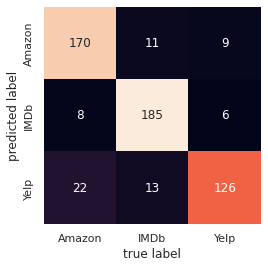

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

#split the test and train data
Website = ['Amazon', 'IMDb', 'Yelp' ]
train1, test1 = train_test_split(new_data, test_size=0.2)
vectoriser.fit_transform(train1.Sentence)

#Create the classifier using TF-IDF
mnb1 = MultinomialNB()
mnb1.fit(vectoriser.transform(train1.Sentence), train1.website)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
labels1 = mnb1.predict(vectoriser.transform(test1.Sentence))


# Print out the result with Heatmap
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test1.website, labels1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=Website, yticklabels=Website)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### The Classifier with Words Frequency Feature

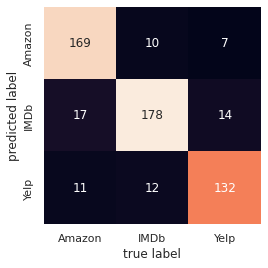

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

#split the test and train data
train2, test2 = train_test_split(new_data, test_size=0.2)
count_vector = CountVectorizer()
data_counts = count_vector.fit_transform(train2.Sentence)

#Create the classifier using Word Frequency
mnb2 = MultinomialNB()
mnb2.fit(count_vector.transform(train2.Sentence), train2.website)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
labels2 = mnb2.predict(count_vector.transform(test2.Sentence))

# Print out the result with Heatmap
mat = confusion_matrix(test2.website, labels2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=Website, yticklabels=Website)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### Conclusion

From the accuracy score below, we can know that the accuracy rate of the classifier with words frequency feature is slightly lower than the accuracy rate of the classifier with TF-IDF feature.

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test1.website, labels1))
print(accuracy_score(test2.website, labels2))

0.8745454545454545
0.8709090909090909


The reason that the accuracy rate of the classifier with TF-IDF feature is higher might be that TF-IDF takes the `inverse document frequency`(IDF) into consideration, which looks at how common or uncommon a word is among the corpus. 

IDF can help correct those frequently appearing words like "the" "this" by minimizing the weight of the frequent terms and making the infrequent terms have a high weight.

